<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

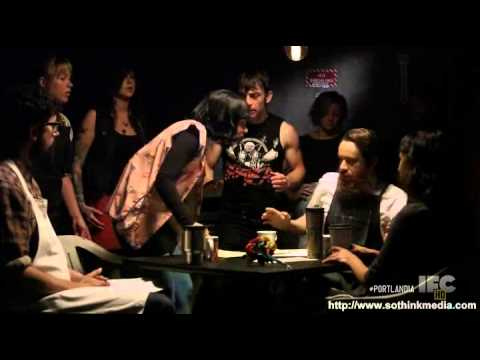

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/mnt/c/Users/tigju/Documents/Lambda School/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [44]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [45]:
# Start here 
shops['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [46]:
shops['full_review_text'].value_counts(normalize=True)[:10]

 10/16/2016 Amazing coffee! Waffle banana and nutella is incredible! Beautiful place! The service is great! Everything is just perfect!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 0.000525
 11/23/2016 1 check-in My best friend and I came to The Factory after seeing it on a couple of best new Austin brunch lists. It's super cute and trendy, to the point where it feels ki

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [47]:
# add tokens column, convert to lowercase
import re

shops['tokens'] = shops['full_review_text'].apply(lambda x: re.sub('[^a-zA-Z ]', '', x).lower().split())
shops['clean_rating'] = shops['star_rating'].apply(lambda x: re.sub('[^0-5.]', '', x))

shops.head(3)

,coffee_shop_name,full_review_text,star_rating,tokens,clean_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[checkin, love, love, loved, the, atmosphere, ...",5.0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[listed, in, date, night, austin, ambiance, in...",4.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[checkin, listed, in, brunch, spots, i, loved,...",4.0


In [48]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 34809),
 ('and', 26651),
 ('a', 22756),
 ('i', 20249),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10354),
 ('was', 9707),
 ('in', 9546)]

In [49]:
# fuction which takes a corpus of document and returns and dataframe of word counts for us to analyze.
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [50]:
# Use the Function
wc = count(shops['tokens'])

In [51]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
4,the,6847,34809,1.0,0.045412,0.045412,0.899028
43,and,6864,26651,2.0,0.034769,0.080180,0.901261
38,a,6246,22756,3.0,0.029687,0.109868,0.820116
46,i,5532,20249,4.0,0.026417,0.136284,0.726366
19,to,5653,17164,5.0,0.022392,0.158676,0.742253


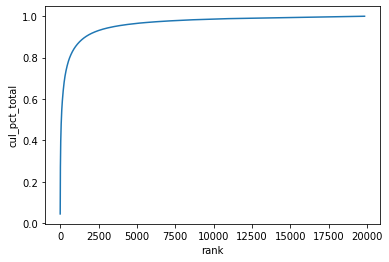

In [52]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [53]:
wc[wc['rank'] <= 100]['cul_pct_total'].max()

0.5426164642156858

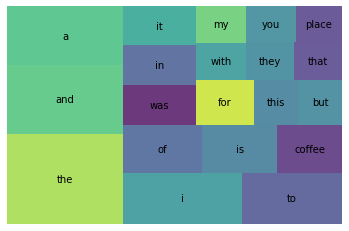

In [54]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [55]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [56]:
# Tokenizer Pipe

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops['tokenizer_tokens'] = tokens

In [57]:
shops['tokenizer_tokens'].head()

0    [ , 11/25/2016, 1, check-in, Love, love, loved...
1    [ , 12/2/2016, Listed, in, Date, Night:, Austi...
2    [ , 11/30/2016, 1, check-in, Listed, in, Brunc...
3    [ , 11/25/2016, Very, cool, decor!, Good, drin...
4    [ , 12/3/2016, 1, check-in, They, are, located...
Name: tokenizer_tokens, dtype: object

In [58]:
word_count = count(shops['tokenizer_tokens'])
word_count

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
3,the,6520,27779,1.0,0.034334,0.034334,0.856092
14,and,6804,25748,2.0,0.031824,0.066157,0.893382
48,,7616,22606,3.0,0.027940,0.094097,1.000000
46,a,6181,22085,4.0,0.027296,0.121394,0.811581
0,I,5469,19780,5.0,0.024447,0.145841,0.718093
...,...,...,...,...,...,...,...
46121,restrictions.,1,1,46124.0,0.000001,0.999995,0.000131
46122,"specially,",1,1,46125.0,0.000001,0.999996,0.000131
46125,"digestion,",1,1,46126.0,0.000001,0.999998,0.000131
46124,Iced.,1,1,46127.0,0.000001,0.999999,0.000131


In [59]:
# Spacy's Default Stop Words
STOP_WORDS = nlp.Defaults.stop_words

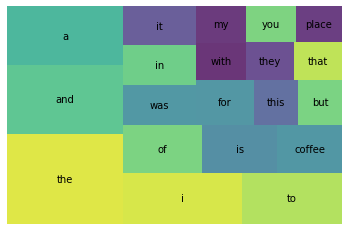

In [61]:
wc = count(shops['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

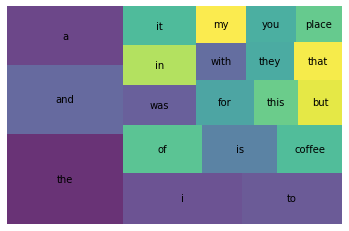

In [62]:
word_c = count(shops['tokenizer_tokens'])

word_c_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [63]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['no_stopwords_tokens'] = tokens

In [64]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens,clean_rating,tokenizer_tokens,no_stopwords_tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[checkin, love, love, loved, the, atmosphere, ...",5.0,"[ , 11/25/2016, 1, check-in, Love, love, loved...","[ , 11/25/2016, 1, check-in, love, love, loved..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[listed, in, date, night, austin, ambiance, in...",4.0,"[ , 12/2/2016, Listed, in, Date, Night:, Austi...","[ , 12/2/2016, listed, date, night:, austin,, ..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[checkin, listed, in, brunch, spots, i, loved,...",4.0,"[ , 11/30/2016, 1, check-in, Listed, in, Brunc...","[ , 11/30/2016, 1, check-in, listed, brunch, s..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[very, cool, decor, good, drinks, nice, seatin...",2.0,"[ , 11/25/2016, Very, cool, decor!, Good, drin...","[ , 11/25/2016, cool, decor!, good, drinks, ni..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[checkin, they, are, located, within, the, nor...",4.0,"[ , 12/3/2016, 1, check-in, They, are, located...","[ , 12/3/2016, 1, check-in, located, northcros..."


In [65]:
word_count = count(shops['no_stopwords_tokens'])
word_count.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
27,,7616,22606,1.0,0.053125,0.053125,1.000000
10,coffee,4210,8058,2.0,0.018937,0.072062,0.552784
143,place,3029,4264,3.0,0.010021,0.082083,0.397715
163,great,2438,3250,4.0,0.007638,0.089721,0.320116
273,it's,2061,3117,5.0,0.007325,0.097046,0.270614


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

